# W którym kraju jaka kategoria jest najbardziej popularna i dochodowa

In [40]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
#import project_code as pc

In [41]:
df_clean = pc.f_file_import('df_clean.csv')

***

In [42]:
# Stworzenie zagregowanych tabeli:

In [43]:
country_state_usd_goal_real_df = pc.aggregate_fun(df_clean, ['country','state'], 'usd_goal_real')
pc.sorting_values(country_state_usd_goal_real_df).head()

,index,country,state,count,sum,mean
0,8,CH,failed,465,1.960094e+08,421525.553312
1,16,FR,failed,1612,2.119308e+08,131470.710974
2,10,DE,failed,2499,2.536111e+08,101485.045966
3,24,IT,failed,1930,1.912716e+08,99104.481746
4,32,NL,failed,1794,1.613765e+08,89953.460708


In [44]:
country_state_usd_pledged_real_df = pc.aggregate_fun(df_clean, ['country','state'], 'usd_pledged_real')
country_state_usd_pledged_real_df.head()

,country,state,count,sum,mean
0,AT,failed,378,600429.16,1588.436931
1,AT,successful,107,8551657.31,79922.030935
2,AU,failed,4606,5384556.90,1169.031025
3,AU,successful,2010,37703715.97,18758.067647
4,BE,failed,371,360382.29,971.380836


***

In [45]:
#definicja development
#funkcja wykres słupkowy - liczebność - jedna zmienna
def f_barplot_1_var(name, var:str, size:tuple = (10,6)):
    name.groupby(var)[var].count().sort_values(ascending = False).plot(kind = 'bar', figsize = size);

In [46]:
#definicja development
#funkcja agregująca dane do nowego DF
def aggregate_fun(df, agg_list:list, measure:str):
    agg_df = df.groupby(agg_list)[measure].agg(['count',sum,'mean']).reset_index()
    return agg_df
    #['country','main_category'] 'usd_pledged_real'

In [47]:
#definicja development
#funkcja sortująca
def sorting_values(df_agg, value_by:str = 'mean', sorting_var:bool = False):
    return df_agg.sort_values(by =value_by, ascending= sorting_var).reset_index()

In [48]:
#Przypisanie do zmiennej
df_agg = sorting_values(country_state_usd_pledged_real_df)
df_agg.head()

,index,country,state,count,sum,mean
0,1,AT,successful,107,8551657.31,79922.030935
1,9,CH,successful,187,11278747.18,60314.156043
2,33,NL,successful,617,25057975.04,40612.601361
3,21,HK,successful,216,8650421.43,40048.247361
4,11,DE,successful,937,33582266.36,35840.198890


In [49]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def barplot_2var(df, var1:str, var2:str, measure, height_value:float = 4):
    sns.catplot(data = df, col = var1 , x = var2, y = measure , kind = 'bar', height = height_value);
    #'country' 'main_category' 'count'

In [50]:
#definicja development
#funkcja wykres słupkowy - średnia - dwie zmienne
# var1 - zmienna grupująca, var2 - zmienna grupowana
def f_barplot_2_var_mean(name, var1:str, var2:str, size:tuple = (10,6)):
    name.groupby(var1)[var2].mean().sort_values(ascending=False).plot(kind='bar', figsize = size);

### Kraje

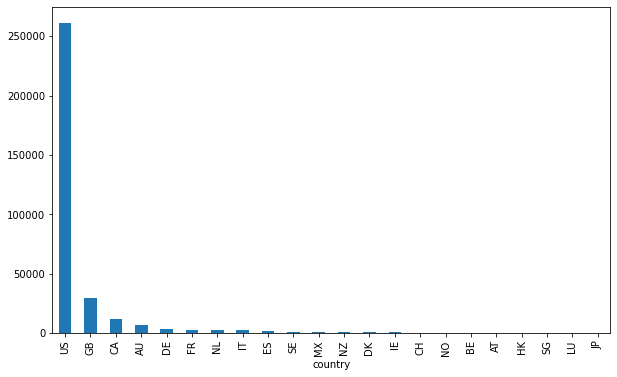

In [51]:
country_count = f_barplot_1_var(df_clean, 'country')

### Kategoria Główna

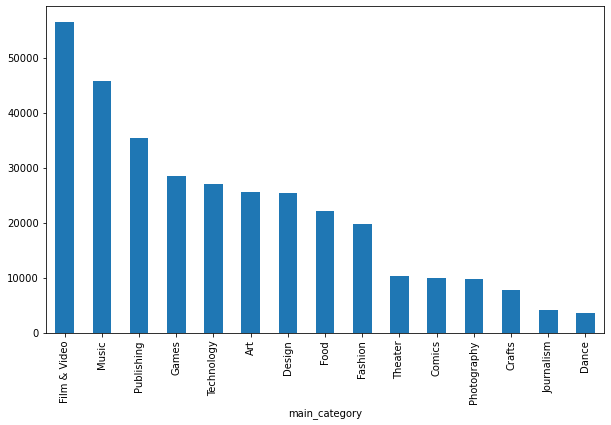

In [52]:
main_category_count = f_barplot_1_var(df_clean, 'main_category')

### Statusy

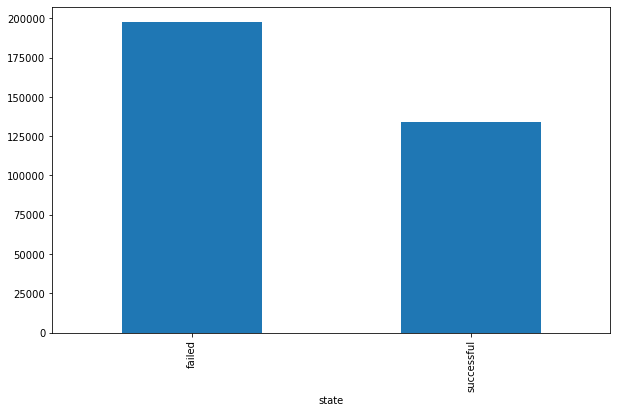

In [53]:
state_count = f_barplot_1_var(df_clean, 'state')

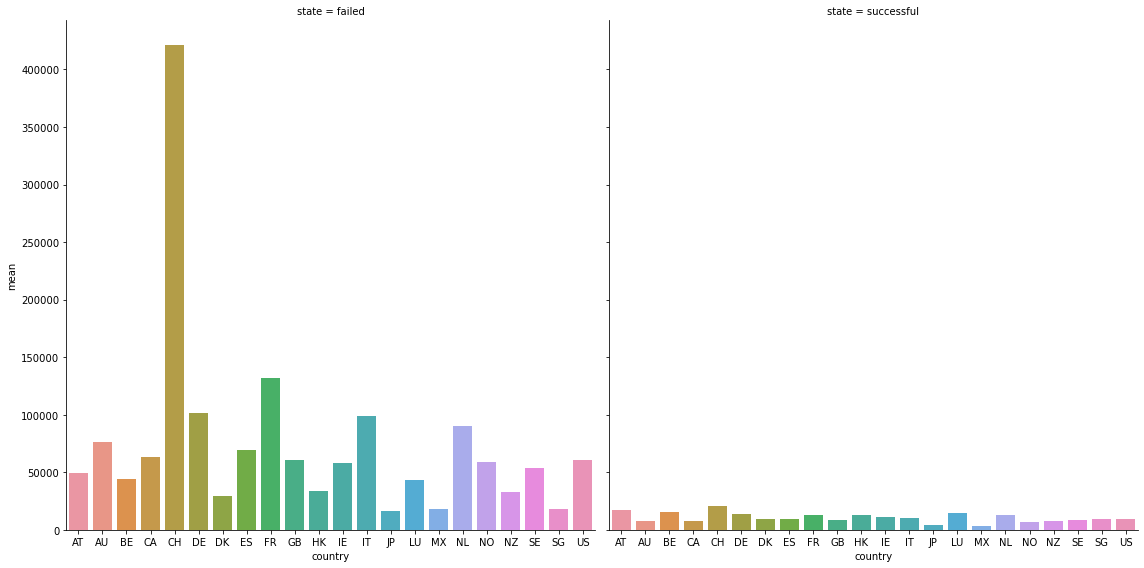

In [54]:
#średnia kwota celu w poszczególnych krajach w podziale na udane i nieudane projekty
barplot_2var(country_state_usd_goal_real_df, 'state', 'country', 'mean', 8)

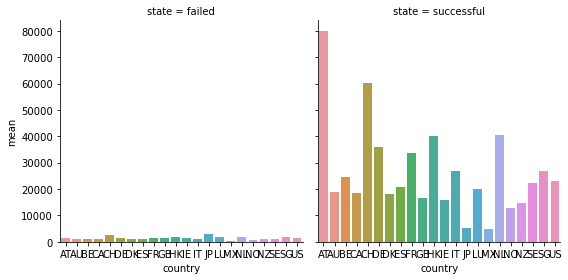

In [55]:
#średnia uzbierana kwota w poszczególnych krajach w podziale na udane i nieudane projekty
barplot_2var(country_state_usd_pledged_real_df, 'state', 'country', 'mean')